<a href="https://colab.research.google.com/github/cfr3yt/cfr3yt.github.io/blob/main/Week3-1/05_R_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

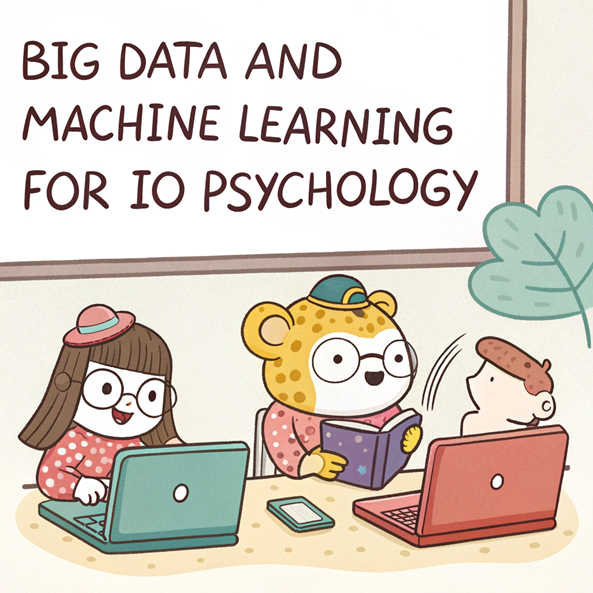

Dr. Philseok Lee @ George Mason University, IO Psy Program

# **Using Python and R Simultaneously in Google Colab: Installing Required Packages**

## **Installing packag**e

To execute R code in Google Colab, you need to install the ***rpy2*** package. This package allows you to integrate R and Python in a single Colab notebook seamlessly.

In [1]:
!pip --q install rpy2

Ok, here, I will provide a brief explanation of the code **above**.

**!pip --q install rpy2**

**!**: In Jupyter notebooks (including Google Colab), you can use ! to run shell commands directly from the notebook.
pip:

**pip** is the Python package installer. It is used to install, update, or manage Python libraries.

**--q**: This is a shorthand for **--quiet**, which suppresses the output of the installation process. This keeps the notebook output cleaner by hiding unnecessary details during the installation.

**install rpy2**: This tells pip to install the rpy2 package, which is a Python library that **provides an interface to run R code from Python**. This is particularly useful for combining Python and R functionalities in the same environment, such as Google Colab.


## **Loading R magic command**

After Installing the rpy2 Package, Load the R Magic Command

In [2]:
%load_ext rpy2.ipython

The **%load_ext** and **rpy2.ipython** command loads the "magic commands" that allow you to run R code within an IPython environment (e.g., Jupyter Notebook, Google Colab).

Here’s a detailed explanation:

- **%load_ext**: This is a magic command in the IPython environment used to **load extension modules**. These extensions enhance the basic functionality of IPython.
- rpy2.ipython: rpy2 is a package that provides an interface between Python and R.
- The **rpy2.ipython** module is an extension specifically designed for IPython environments. When this module is loaded, you can use R-specific magic commands (%R and %%R) to run R code directly in the IPython environment.

Therefore, by executing the %load_ext and rpy2.ipython command, the ability to execute R code within an IPython environment (like Google Colab or Jupyter Notebook) is activated.

## **Running R Code**

To execute R code, you use the **%R** or **%%R** magic commands:

- **%R**: Used to execute a single line of R code.

- **%%R**: Used to execute an entire cell of R code.

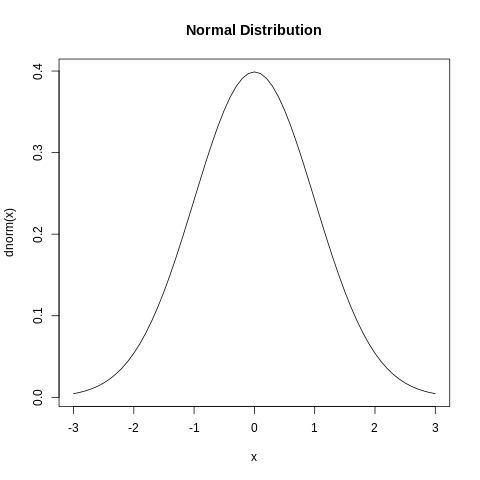

In [3]:
%%R
x <- seq(-3, 3, 0.1)
plot(x, dnorm(x), type = "l")
title("Normal Distribution")

## **Data Exchange Between Python and R**

You can transfer variables from Python to R or bring variables from R to Python.

This example will:

- Define a variable in Python (x = 3).
- Send it to R and perform a calculation (z = x + 10 in R).
- Bring z back to Python and use it in a string multiplication operation.

###  **Step 1: Start in Python**

Define a variable in Python (x = 3) and print a message using it.

In [5]:
# Define a variable in Python
x = 3

# Print a greeting message
print("Hello,", "Class! " * x)

Hello, Class! Class! Class! 


### **Step 2: Send x to R and Modify it**

Now, send x from Python to R, perform a calculation (z = x + 10), and print it in R.

In [6]:
%%R -i x  # Inport 'x' from Python into R

# Perform a calculation in R
z <- x + 2

# Print 'z' in R
print(paste("Value of z in R:", z))

[1] "Value of z in R: 5"


-i x: This is an argument passed to the %%R magic.

-i stands for "input" and is used to specify a Python variable that you want to make available within the R environment.
x is the name of the Python variable you are passing to R.

### **Step 3: Transfer z Back to Python**

Now, export z from R to Python and use it.

In [7]:
%%R -o z  # Send 'z' from R to Python

print(paste("Returning z to Python:", z))

[1] "Returning z to Python: 5"


### **Step 4: Use z in Python**

Now that z is back in Python, we can use it in another calculation.

In [8]:
# Convert z from a NumPy array to an integer
z = int(z[0])

# Print the value of z in Python
print("Value of z in Python:", z)

# Now, use it in string multiplication
print("Welcome! " * z)

Value of z in Python: 5
Welcome! Welcome! Welcome! Welcome! Welcome! 


Hello Hello Hello Hello Hello Hello Hello Hello Hello Hello Hello Hello Hello 


<ipython-input-34-c6e52d4f0e19>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Hello " * int(z))


## **Using Pyton and R simultaneously**

In [ ]:
%load_ext rpy2.ipython

### Import Python library

In [ ]:
#Import Python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import R library

In [ ]:
%%R
#Import R library
library(ggplot2)
library(dplyr)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




### Read data from R

In [ ]:
#Read data from R
%%R

head(mtcars)

df <- mtcars %>%
      group_by(cyl) %>%
      summarize(avg_mpg = mean(mpg))

df <- as.data.frame(df)
df

  cyl  avg_mpg
1   4 26.66364
2   6 19.74286
3   8 15.10000


### Creating graph using R

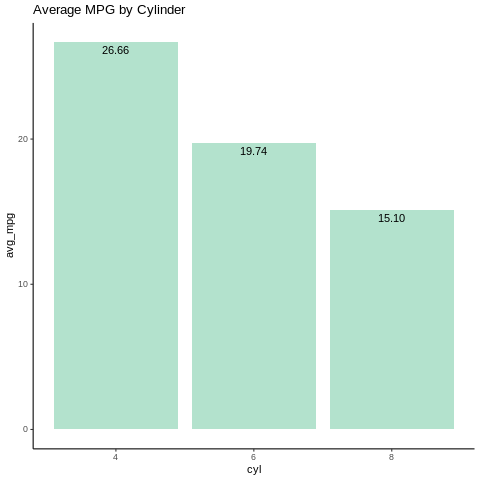

In [ ]:
#Creating graph using R
%%R

ggplot(df, aes(x = as.factor(cyl), y = avg_mpg)) +
  geom_bar(stat = "identity", fill = '#B3E2CD') +  # Pastel green
  labs(x = 'cyl', y = 'avg_mpg', title = 'Average MPG by Cylinder') +
  theme_classic() +
  geom_text(aes(label = sprintf("%0.2f", round(avg_mpg, digits = 2))), vjust = 1.5)

### Creating graph via Python

In [ ]:
#Creating graph via Python
%%R -o df

df

  cyl  avg_mpg
1   4 26.66364
2   6 19.74286
3   8 15.10000


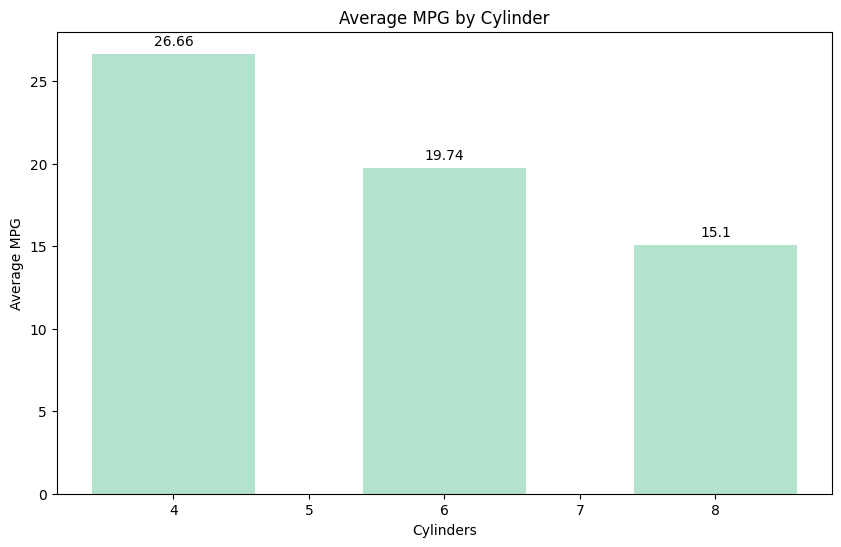

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df['cyl'], df['avg_mpg'], color='#B3E2CD', width=1.2)  # Pastel green

# Add text labels on bars
[ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, round(bar.get_height(), 2), ha='center') for bar in bars]

plt.xlabel("Cylinders")
plt.ylabel("Average MPG")
plt.title("Average MPG by Cylinder")
plt.show()